In [2]:
from nilmtk.dataset_converters import convert_ampds
from nilmtk import DataSet
from nilmtk.utils import print_dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams


OrderedDict([(1, Building(instance=1, dataset='AMPds'))])
ElecMeter(instance=19, building=1, dataset='AMPds', appliances=[Appliance(type='television', instance=1)])
ElecMeter(instance=19, building=1, dataset='AMPds', appliances=[Appliance(type='television', instance=1)])


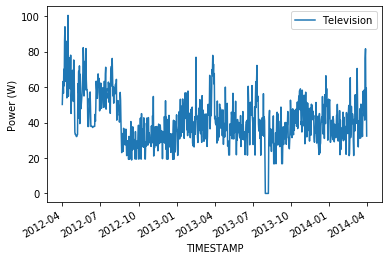

In [9]:
ampds = DataSet("../data/load_profile/AMPds2.h5")
print(ampds.buildings)
elec = ampds.buildings[1].elec
item = 18
tv = elec.meters.__getitem__(item)
print(tv)
ax = tv.plot()
print(tv)

def load_data():
    #ampds = DataSet("./data/load_profile/AMPds2.h5")
    dataset = {}
    nam_map = {}
    elec = ampds.buildings[1].elec
    for item in range(1,20):
        appl = elec.meters.__getitem__(item)
        name = appl.appliances[0].metadata.get('original_name')
        arr = []
        for g in appl.load():
            arr.append(g)
        df = pd.DataFrame(arr[0])
        df.columns = [ 'pf_ap', 'reactive', 'apparent', 'active']
        dataset[name]= df
        dataset[name+"_INFO"] = elec.meters.__getitem__(item).appliances[0].metadata
    return dataset

In [10]:
df = load_data()

In [11]:
import pickle

In [12]:
pickle.dump( df, open( "../data/ampds.p", "wb" ) )

In [13]:
climate = pd.read_csv('../data/load_profile/Climate_HourlyWeather.csv')
drop = ['Data Quality', 'Temp Flag', 'Dew Point Temp Flag', 'Wind Spd Flag', 'Stn Press Flag',
      'Hmdx Flag', 'Wind Chill Flag', 'Wind Dir Flag', 'Rel Hum Flag', 'Visibility Flag']
climate = climate.drop(columns = drop, axis=1)

In [23]:
climate

,Date/Time,Year,Month,Day,Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,2012-04-01 00:00,2012,4,1,00:00,4.3,2.3,87.0,30.0,28.0,12.9,99.88,NaN,NaN,Rain
1,2012-04-01 01:00,2012,4,1,01:00,4.4,2.2,86.0,30.0,17.0,8.0,99.94,NaN,NaN,Rain - Fog
2,2012-04-01 02:00,2012,4,1,02:00,3.8,1.6,86.0,30.0,26.0,6.4,100.00,NaN,NaN,Rain - Fog
3,2012-04-01 03:00,2012,4,1,03:00,2.8,0.7,86.0,29.0,39.0,8.0,100.10,NaN,NaN,Rain - Fog
4,2012-04-01 04:00,2012,4,1,04:00,2.4,0.4,87.0,29.0,30.0,9.7,100.23,NaN,NaN,Moderate Rain
5,2012-04-01 05:00,2012,4,1,05:00,3.0,0.9,86.0,29.0,35.0,9.7,100.37,NaN,NaN,Rain
6,2012-04-01 06:00,2012,4,1,06:00,3.7,1.7,87.0,27.0,30.0,12.9,100.55,NaN,NaN,Rain
7,2012-04-01 07:00,2012,4,1,07:00,4.7,1.3,79.0,26.0,24.0,16.1,100.74,NaN,NaN,Mostly Cloudy
8,2012-04-01 08:00,2012,4,1,08:00,5.3,1.3,75.0,21.0,20.0,24.1,100.94,NaN,NaN,Mostly Cloudy
9,2012-04-01 09:00,2012,4,1,09:00,5.9,1.9,75.0,17.0,13.0,24.1,101.07,NaN,NaN,Mostly Cloudy


In [24]:
climate.describe()

,Year,Month,Day,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
count,17520.000000,17520.000000,17520.000000,17498.000000,17484.000000,17482.000000,16663.000000,17489.000000,17505.000000,17485.000000,663.000000,548.000000
mean,2012.746575,6.526027,15.720548,10.369865,6.501190,78.252317,17.359779,12.902281,29.110197,101.721658,26.524887,-5.983577
std,0.660152,3.447950,8.796498,6.071265,5.487782,13.441549,9.197307,8.170830,13.375264,0.774825,1.632996,3.048317
min,2012.000000,1.000000,1.000000,-9.700000,-20.600000,19.000000,1.000000,0.000000,0.000000,97.990000,25.000000,-15.000000
25%,2012.000000,4.000000,8.000000,5.800000,3.100000,69.000000,10.000000,7.000000,24.100000,101.290000,25.000000,-8.000000
50%,2013.000000,7.000000,16.000000,10.000000,6.500000,80.000000,14.000000,11.000000,24.100000,101.730000,26.000000,-5.000000
75%,2013.000000,10.000000,23.000000,15.100000,10.500000,89.000000,27.000000,17.000000,40.200000,102.190000,27.000000,-4.000000
max,2014.000000,12.000000,31.000000,27.600000,20.200000,100.000000,36.000000,63.000000,56.300000,104.020000,34.000000,0.000000


not numeric
not numeric
not numeric


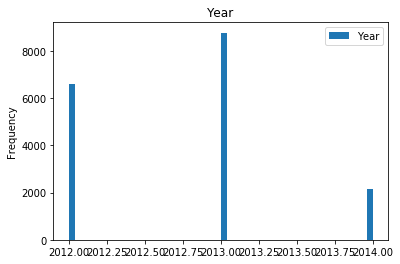

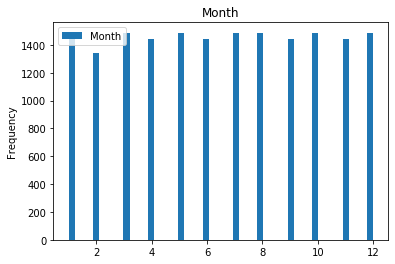

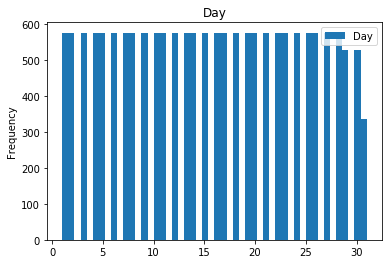

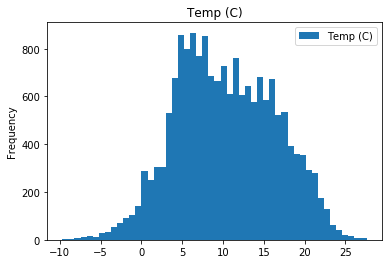

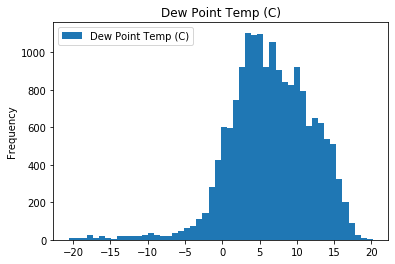

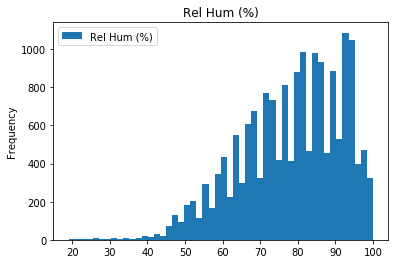

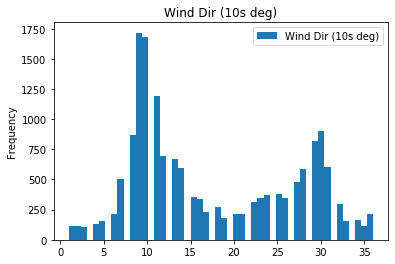

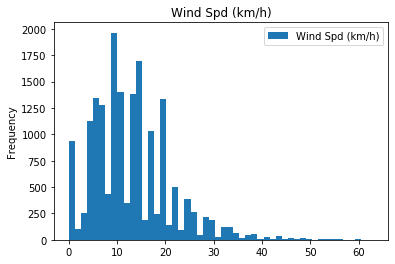

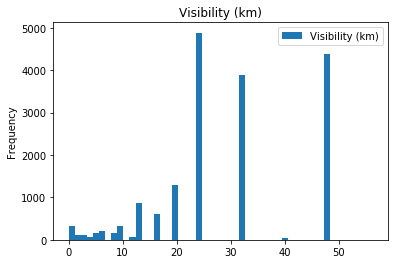

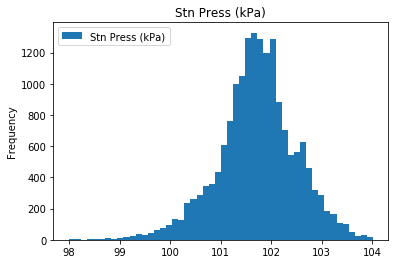

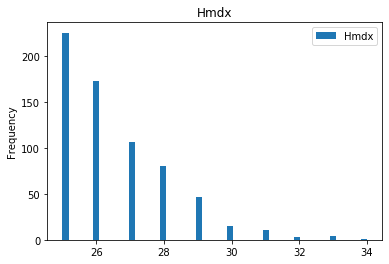

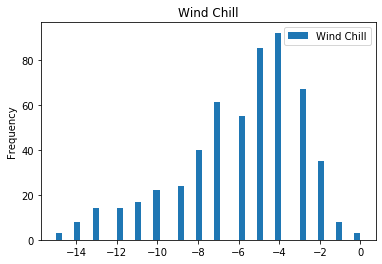

In [25]:
for c in climate.columns:
    try:
        climate[[c]].plot.hist(bins = 50, title = c)
    except:
        print("not numeric")
        

In [26]:
corr = climate[climate.columns].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/home/prasann/.conda/envs/nilmtk-env/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Year,Month,Day,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
Year,1,-0.49,-0.0079,-0.34,-0.25,0.25,-0.019,0.0056,-0.13,0.12,-0.0049,-0.12
Month,-0.49,1,0.012,0.18,0.24,0.1,-0.051,-0.024,0.021,-0.11,-0.1,-0.13
Day,-0.0079,0.012,1,0.012,0.066,0.11,-0.027,-0.026,-0.092,-0.066,-0.052,0.34
Temp (C),-0.34,0.18,0.012,1,0.89,-0.39,0.25,0.07,0.39,-0.22,0.81,0.87
Dew Point Temp (C),-0.25,0.24,0.066,0.89,1,0.068,0.16,0.01,0.14,-0.27,0.44,0.73
Rel Hum (%),0.25,0.1,0.11,-0.39,0.068,1,-0.22,-0.14,-0.59,-0.052,-0.19,0.57
Wind Dir (10s deg),-0.019,-0.051,-0.027,0.25,0.16,-0.22,1,0.11,0.34,0.032,0.16,0.11
Wind Spd (km/h),0.0056,-0.024,-0.026,0.07,0.01,-0.14,0.11,1,-0.011,-0.29,-0.042,-0.57
Visibility (km),-0.13,0.021,-0.092,0.39,0.14,-0.59,0.34,-0.011,1,0.12,0.18,-0.22
Stn Press (kPa),0.12,-0.11,-0.066,-0.22,-0.27,-0.052,0.032,-0.29,0.12,1,-0.21,-0.039


not numeric
not numeric
not numeric


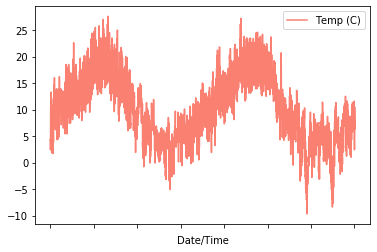

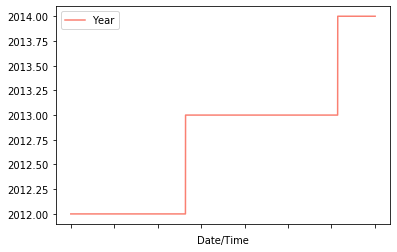

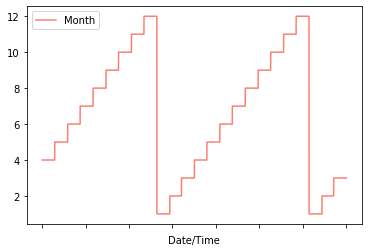

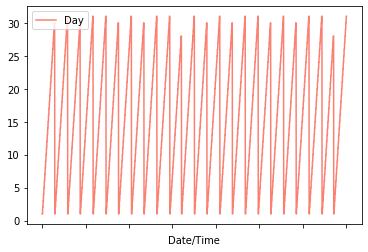

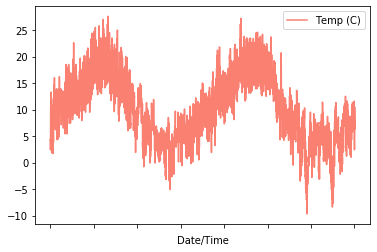

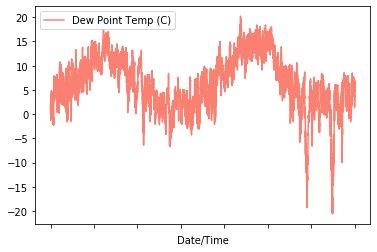

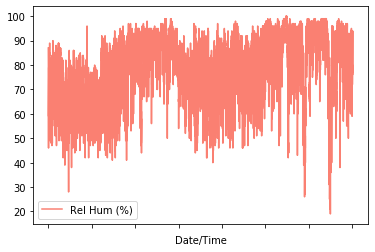

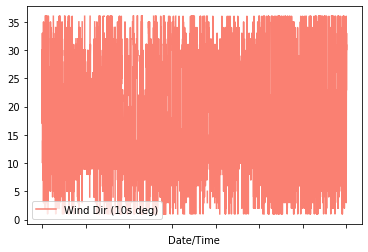

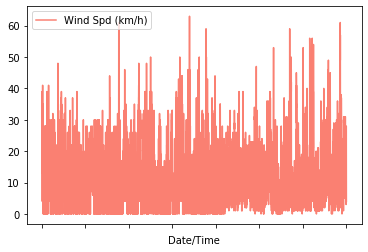

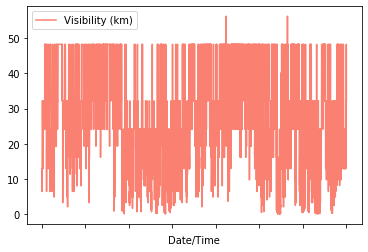

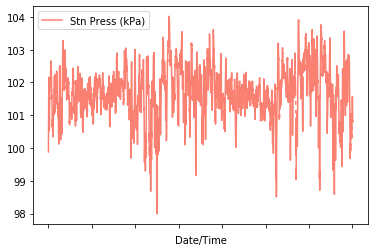

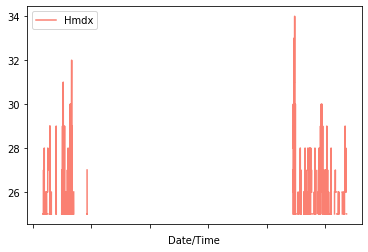

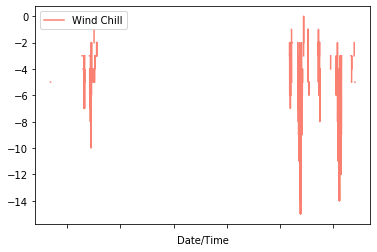

In [27]:
ax = climate.plot.line(x = 'Date/Time', y = 'Temp (C)', color = 'salmon')
for c in climate.columns:
    try:
        climate.plot.line(x = 'Date/Time', y = c, color = 'salmon')
    except:
        print("not numeric")

{'original_name': 'B1E', 'room': 'North Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 1, 'meters': [2], 'dataset': 'AMPds', 'building': 1}
B1E
{'original_name': 'B2E', 'room': 'Master Bedroom and South Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 2, 'meters': [3], 'dataset': 'AMPds', 'building': 1}
B2E
{'original_name': 'BME', 'room': 'Basement', 'type': 'light', 'description': 'Partial Plugs and lights', 'instance': 3, 'meters': [4], 'dataset': 'AMPds', 'building': 1}
BME
{'original_name': 'CDE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Dryer', 'instance': 1, 'meters': [5], 'dataset': 'AMPds', 'building': 1}
CDE
{'original_name': 'CWE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Washer', 'instance': 2, 'meters': [6], 'dataset': 'AMPds', 'building': 1}
CWE
{'original_name': 'DNE', 'room': 'Dining Room', 'type': 'sockets', 'description': 'Plugs', 'instance': 1, 'meters': [7], 'dataset': 'A

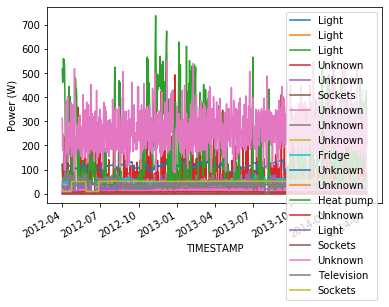

In [58]:
for item in range(1,20):
    elec = ampds.buildings[1].elec
    tv = elec.meters.__getitem__(item)
    print(tv.appliances[0].metadata)
    print(tv.appliances[0].metadata.get('original_name'))
    tv.plot()
    ax.legend(title=tv.appliances[0].metadata.get('original_name'))

In [66]:
elec = ampds.buildings[1].elec
tv = elec.meters.__getitem__(20).available_columns()
tv
#print(tv.appliances[0].metadata.get('original_name'))
#ax = tv.plot()

[('cumulative energy', 'apparent'),
 ('voltage', 'apparent'),
 ('power factor', 'apparent'),
 ('cumulative energy', 'active'),
 ('cumulative energy', 'reactive'),
 ('current', 'apparent'),
 ('frequency', 'apparent'),
 ('power', 'reactive'),
 ('power factor', 'real'),
 ('power', 'apparent'),
 ('power', 'active')]

In [31]:
gen = elec.meters.__getitem__(20).load()

In [32]:
gen

<generator object load at 0x7ff1d4953c50>

In [33]:
arr = []
for g in gen:
    arr.append(g)
df = pd.DataFrame(arr[0])

In [72]:
def get_dataset():
    dataset = {}
    nam_map = {}
    elec = ampds.buildings[1].elec
    for item in range(1,20):
        appl = elec.meters.__getitem__(item)
        name = appl.appliances[0].metadata.get('original_name')
        arr = []
        for g in appl.load():
            arr.append(g)
        df = pd.DataFrame(arr[0])
        df.columns = [ 'pf_ap', 'reactive', 'apparent', 'active']
        dataset[name]= df
        dataset[name+"_INFO"] = elec.meters.__getitem__(item).appliances[0].metadata
    return dataset

In [73]:
dataset = get_dataset()

In [40]:
for k in dataset.keys():
    if 'INFO' in k:
        print(dataset[k])
        print('\n\n\n')
    else:
        print(dataset[k].describe())
        

physical_quantity         power                power factor         power
type                     active      reactive      apparent      apparent
count              1.051200e+06  1.051200e+06  1.051200e+06  1.051200e+06
mean               1.041284e+00  1.990202e-02  6.718396e-02  9.822748e+00
std                8.892020e+00  1.967808e-01  1.749217e-01  8.195083e+00
min                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%                0.000000e+00  0.000000e+00  0.000000e+00  9.000000e+00
50%                0.000000e+00  0.000000e+00  5.000000e-02  9.000000e+00
75%                0.000000e+00  0.000000e+00  5.000000e-02  9.000000e+00
max                6.230000e+02  1.500000e+01  1.000000e+00  8.830000e+02
{'original_name': 'B1E', 'room': 'North Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 1, 'meters': [2], 'dataset': 'AMPds', 'building': 1}




physical_quantity         power                power factor         power
type           

physical_quantity         power                power factor         power
type                     active      reactive      apparent      apparent
count              1.051200e+06  1.051200e+06  1.051200e+06  1.051200e+06
mean               1.565530e+00  1.516577e+00  2.493219e-02  6.483658e+01
std                9.479880e+00  7.569378e+00  2.793035e-02  1.198594e+01
min                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%                0.000000e+00  0.000000e+00  0.000000e+00  6.300000e+01
50%                2.000000e+00  2.000000e+00  3.000000e-02  6.600000e+01
75%                2.000000e+00  2.000000e+00  4.000000e-02  6.600000e+01
max                1.053000e+03  1.128000e+03  1.000000e+00  1.606000e+03
{'original_name': 'GRE', 'room': 'Garage', 'type': 'unknown', 'description': 'Sub-Panel, Detached Building', 'instance': 7, 'meters': [13], 'dataset': 'AMPds', 'building': 1}




physical_quantity         power                power factor         power
type   

{'original_name': 'B1E', 'room': 'North Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 1, 'meters': [2], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'B2E', 'room': 'Master Bedroom and South Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 2, 'meters': [3], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'BME', 'room': 'Basement', 'type': 'light', 'description': 'Partial Plugs and lights', 'instance': 3, 'meters': [4], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'CDE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Dryer', 'instance': 1, 'meters': [5], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'CWE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Washer', 'instance': 2, 'meters': [6], 'dataset': 'AMPds', 'building': 1}






/home/prasann/.conda/envs/nilmtk-env/lib/python3.6/site-packages/pandas/plotting/_core.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


{'original_name': 'DNE', 'room': 'Dining Room', 'type': 'sockets', 'description': 'Plugs', 'instance': 1, 'meters': [7], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'DWE', 'room': 'Kitchen', 'type': 'unknown', 'description': 'Dishwasher', 'instance': 3, 'meters': [8], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'EBE', 'room': 'Home Office', 'type': 'unknown', 'description': 'Electronics Workbench', 'instance': 4, 'meters': [9], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'EQE', 'room': 'Basement', 'type': 'unknown', 'description': 'Security/Network Equipment', 'instance': 5, 'meters': [10], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'FGE', 'room': 'Kitchen', 'type': 'fridge', 'description': 'Fridge', 'instance': 1, 'meters': [11], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'FRE', 'room': 'Basement', 'type': 'unknown', 'description': 'Forced Air Furnace Fan and Thermostat', 'instance': 6, 'meters': [12], 'dataset': 'AMPd

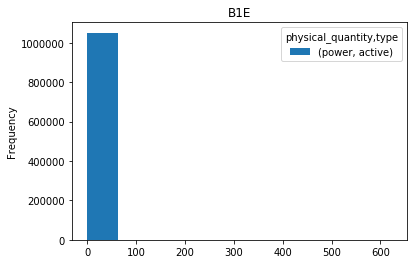

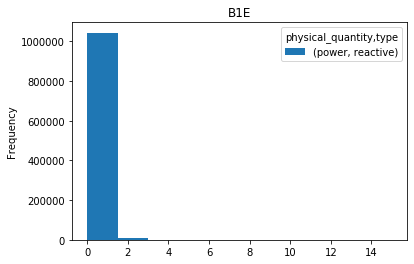

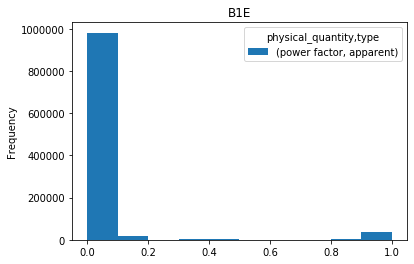

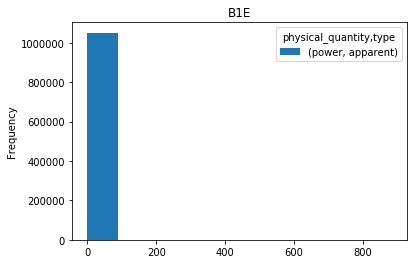

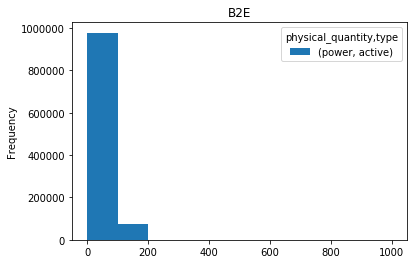

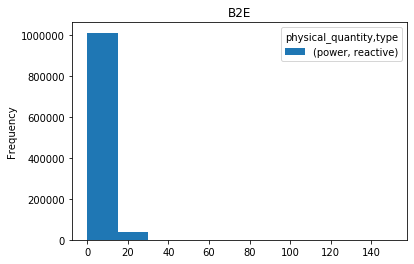

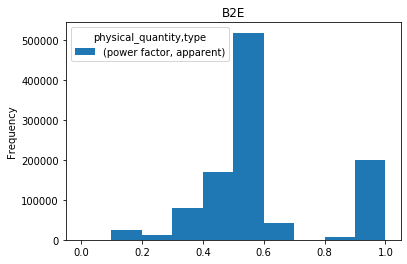

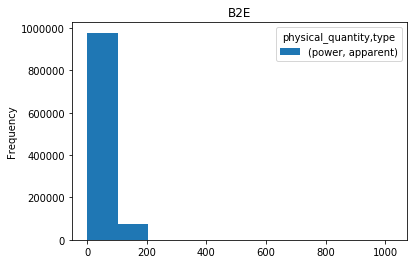

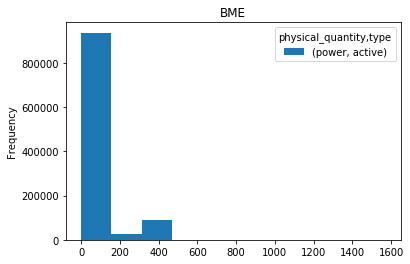

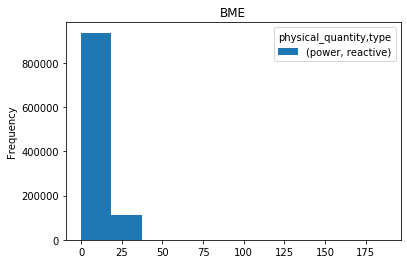

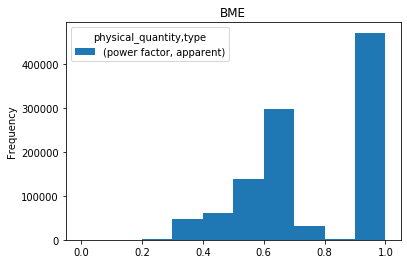

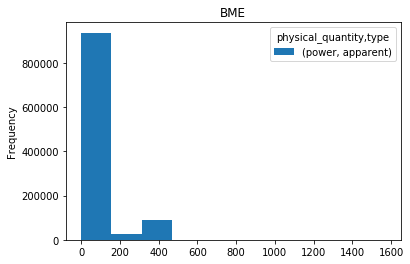

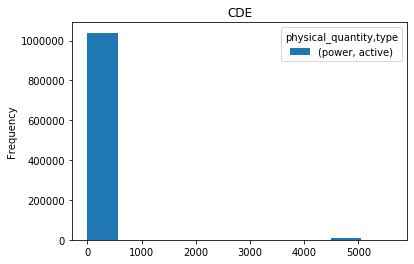

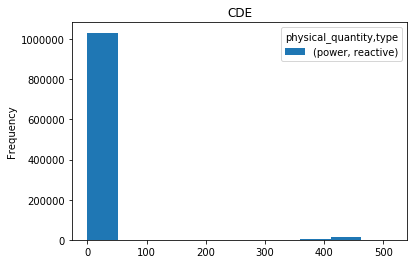

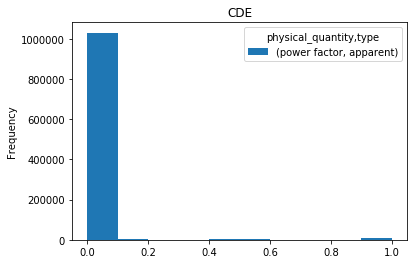

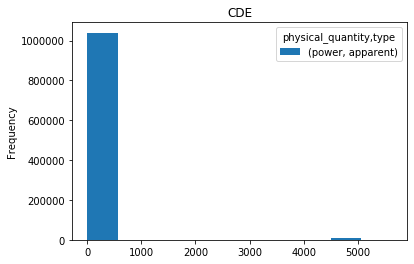

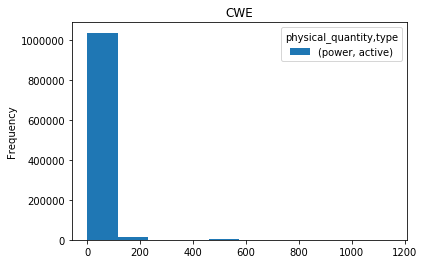

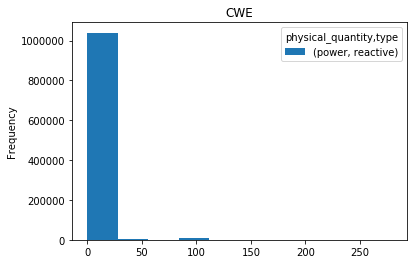

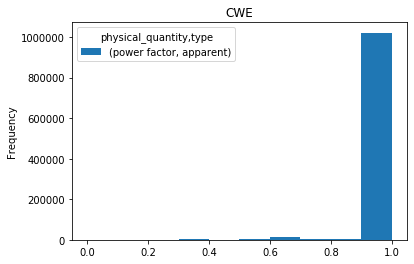

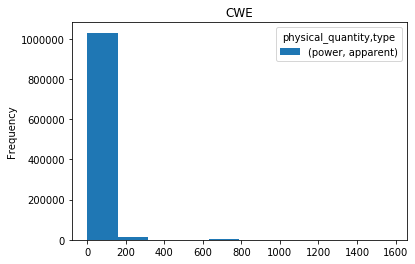

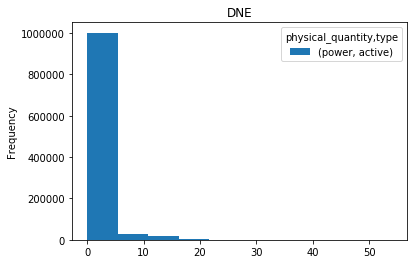

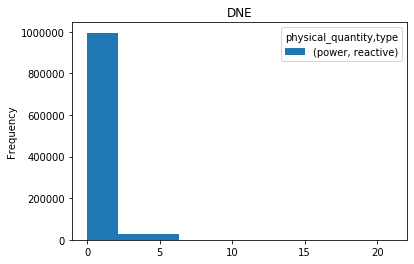

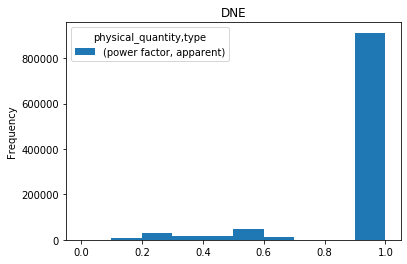

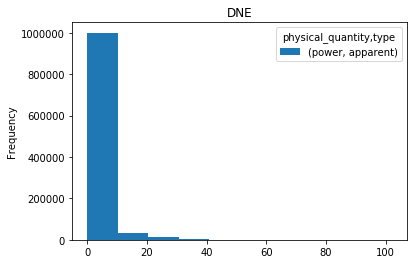

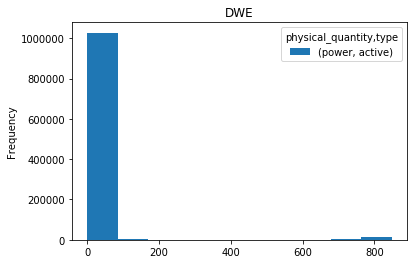

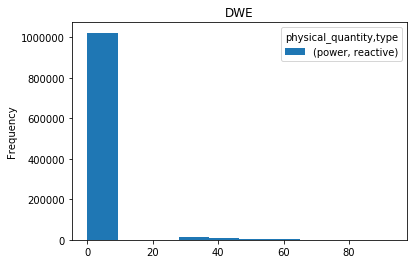

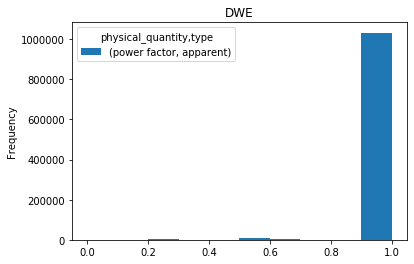

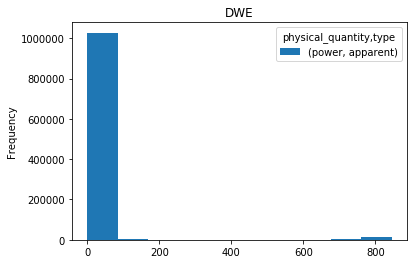

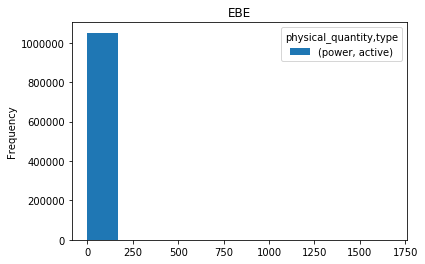

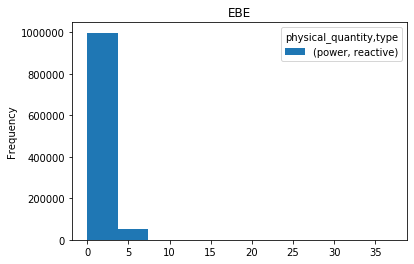

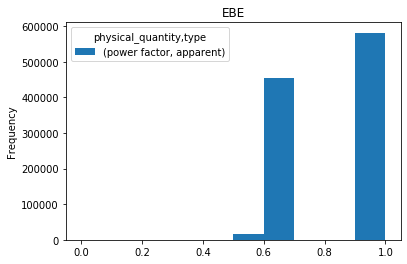

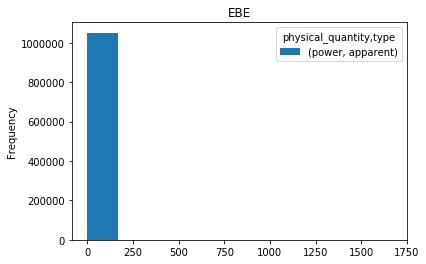

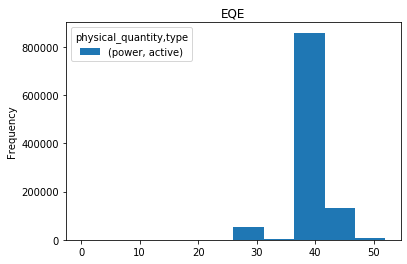

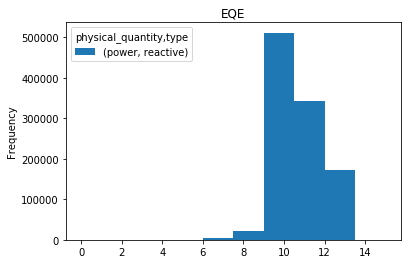

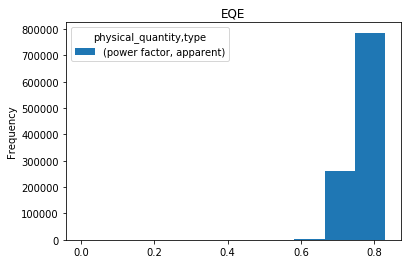

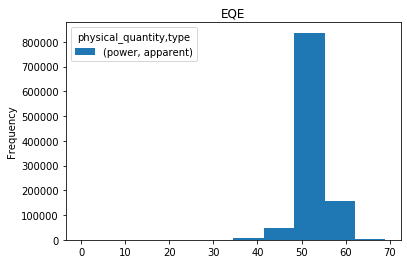

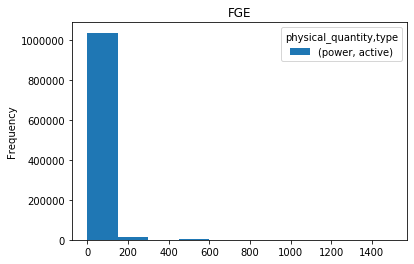

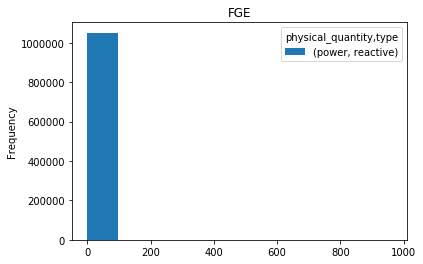

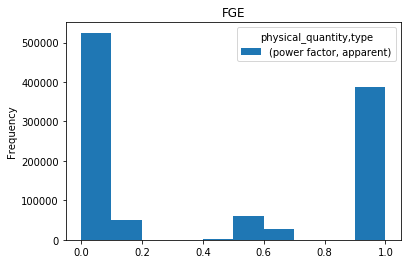

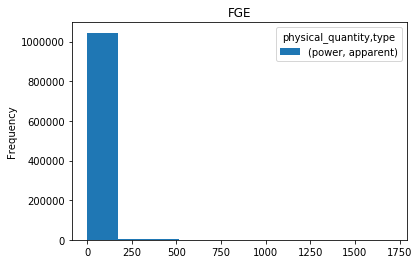

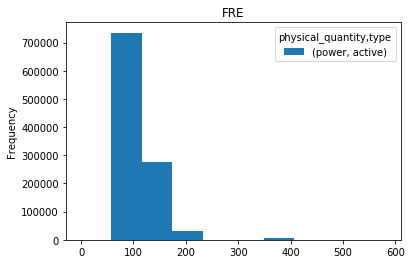

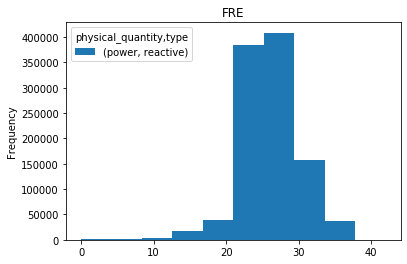

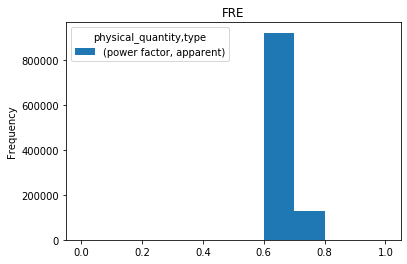

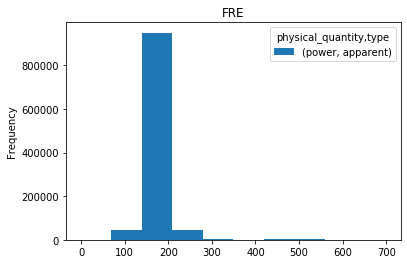

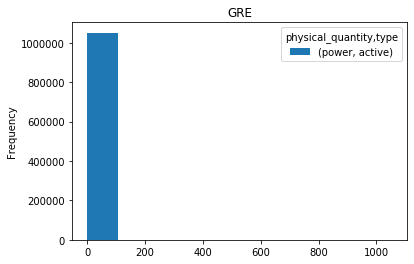

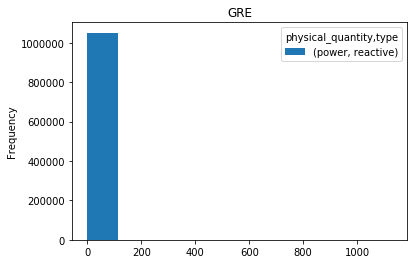

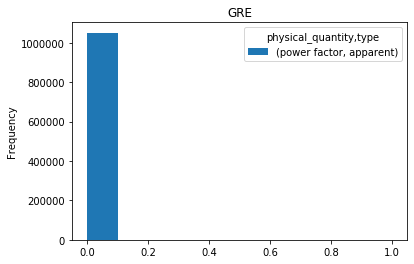

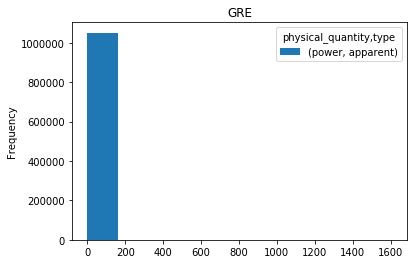

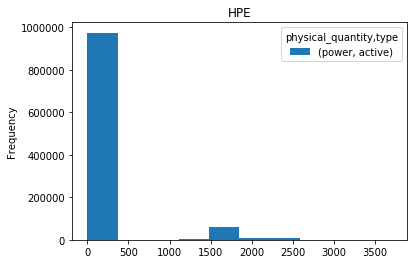

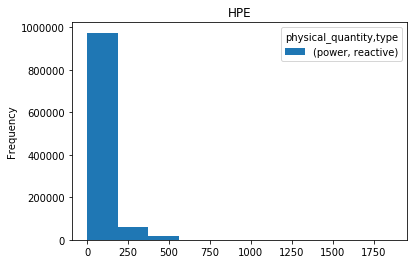

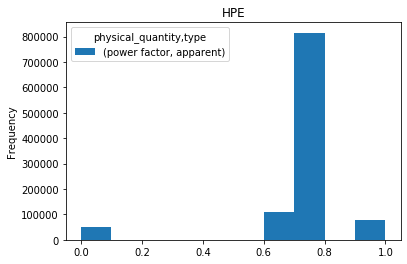

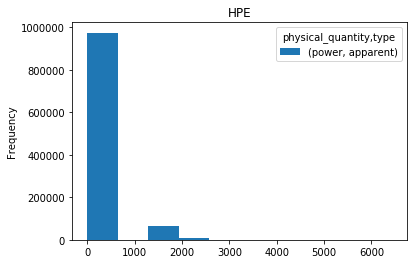

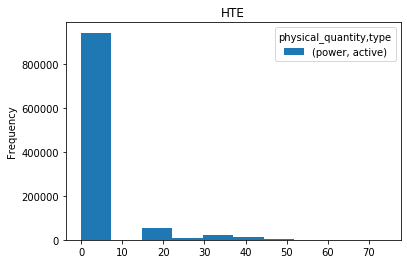

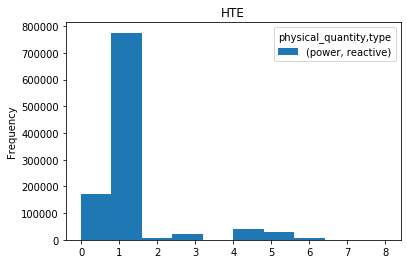

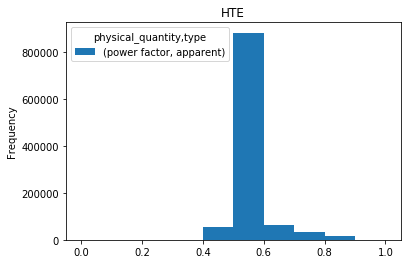

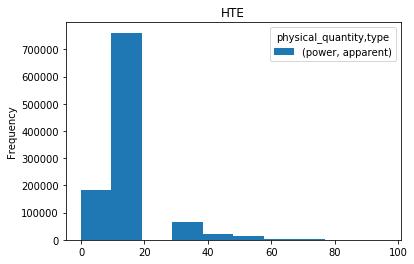

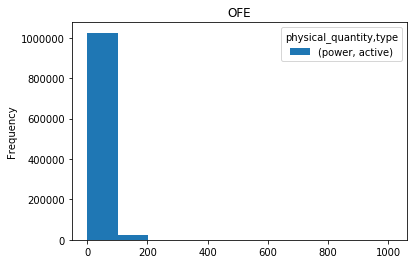

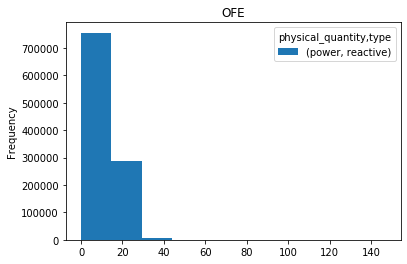

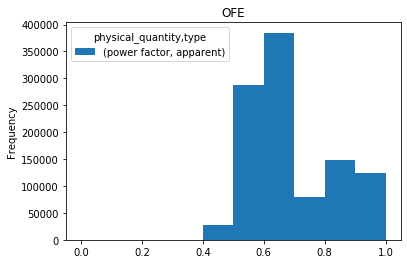

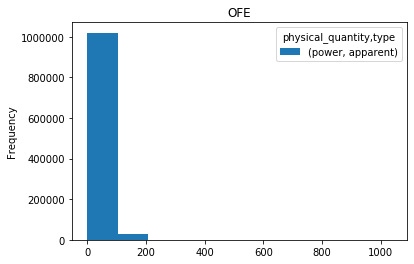

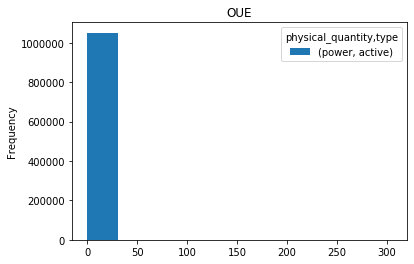

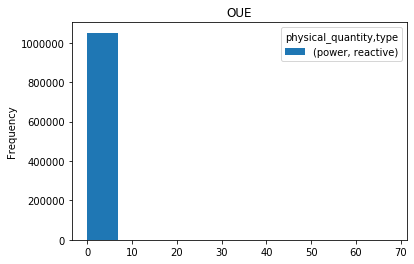

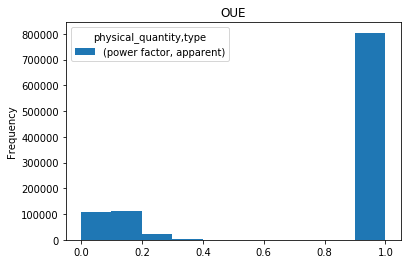

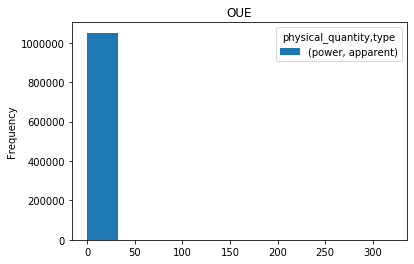

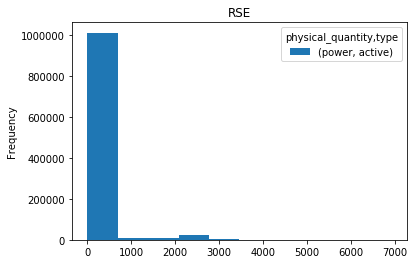

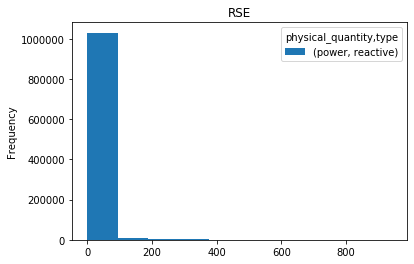

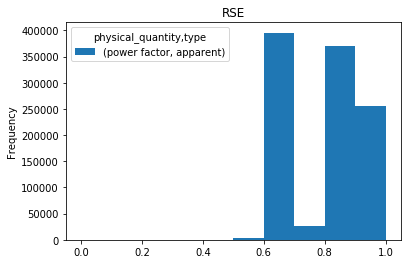

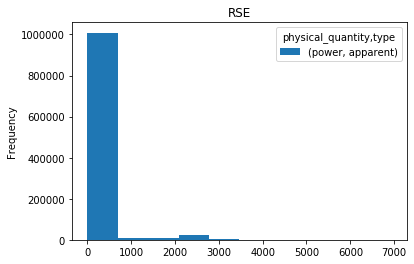

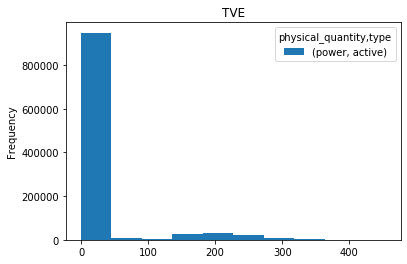

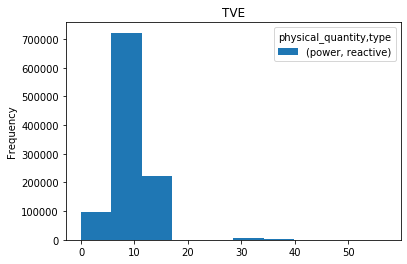

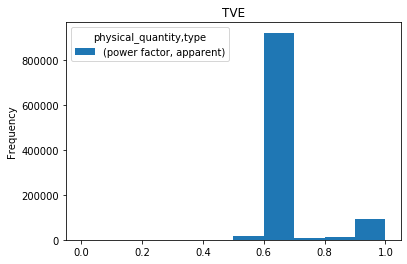

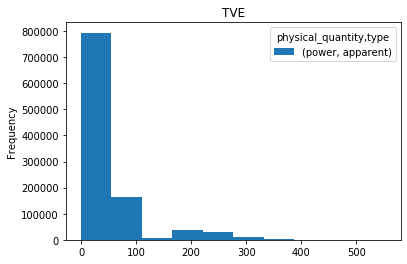

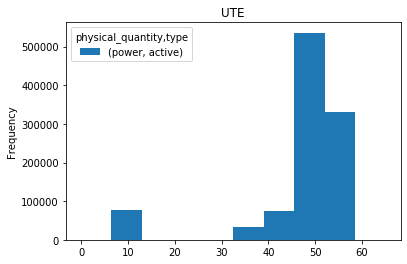

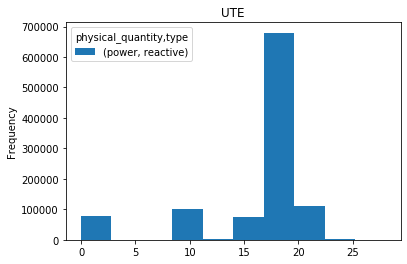

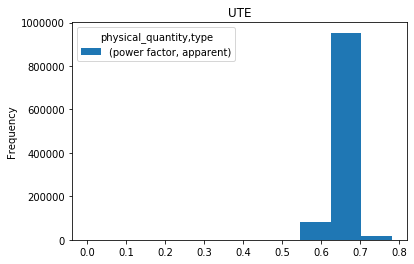

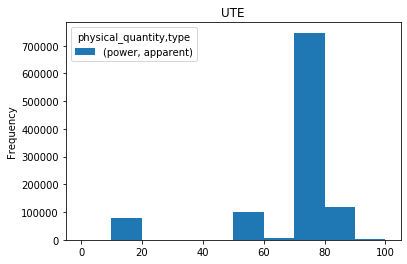

In [55]:
for k in dataset.keys():
    if 'INFO' in k:
        print(dataset[k])
        print('\n\n\n')
    else:
        df = dataset[k]
        for c in df.columns:
            try:
                df[[c]].plot.hist(bins = 10, title = k)
            except:
                print("not numeric")


In [ ]:
ax = []
colors = ['red', 'blue', 'green', 'orange']
for k in dataset.keys():
    if 'INFO' in k:
        print(dataset[k])
        print('\n\n\n')
    else:
        i = 0
        df = dataset[k]
        tmp = df.plot.line(x = 'DATETIME', y = 'power_apparent', color = colors[0])
        for c in df.columns:
            try:
                df[[c]].plot.hist(bins = 10, title = k)
            except:
                print("not numeric")

In [75]:
for c in dataset['B1E'].columns:
    print(c)

pf_ap
reactive
apparent
active


{'original_name': 'B1E', 'room': 'North Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 1, 'meters': [2], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'B2E', 'room': 'Master Bedroom and South Bedroom', 'type': 'light', 'description': 'Plugs and lights', 'instance': 2, 'meters': [3], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'BME', 'room': 'Basement', 'type': 'light', 'description': 'Partial Plugs and lights', 'instance': 3, 'meters': [4], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'CDE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Dryer', 'instance': 1, 'meters': [5], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'CWE', 'room': 'Basement', 'type': 'unknown', 'description': 'Clothes Washer', 'instance': 2, 'meters': [6], 'dataset': 'AMPds', 'building': 1}




{'original_name': 'DNE', 'room': 'Dining Room', 'type': 'sockets', 'description': 'Plugs', 'instance': 1, 'meters': [7], 'dataset': 'A

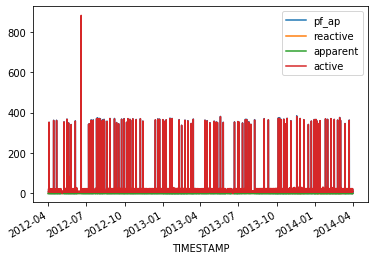

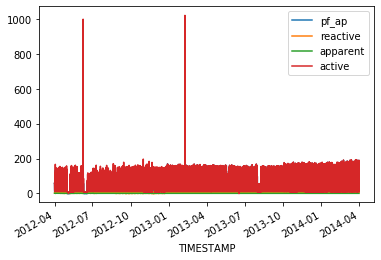

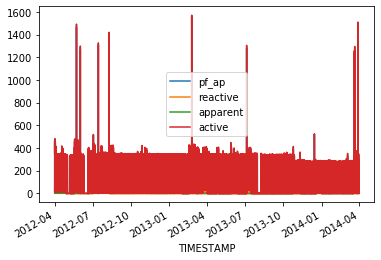

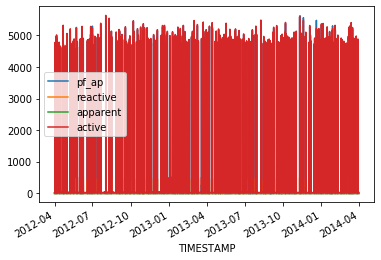

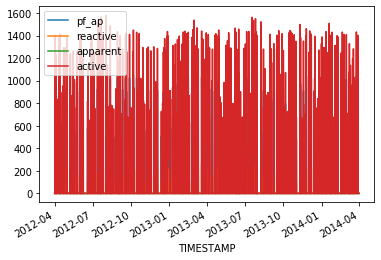

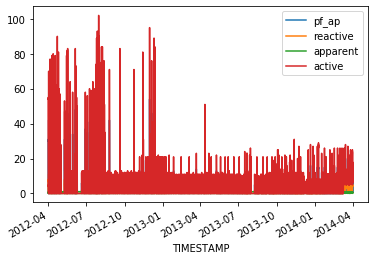

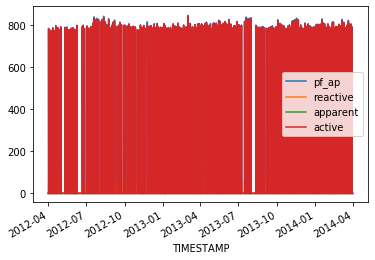

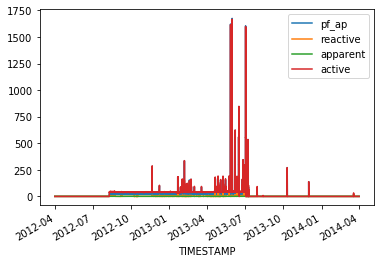

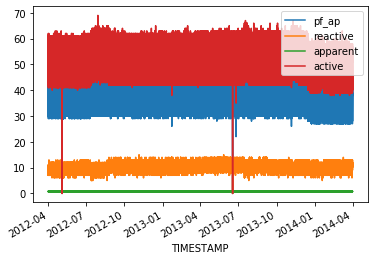

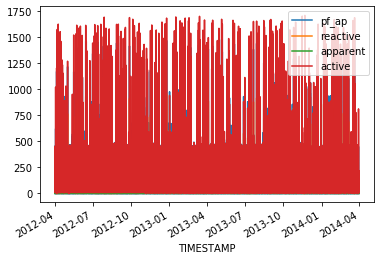

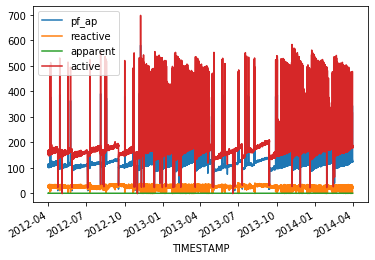

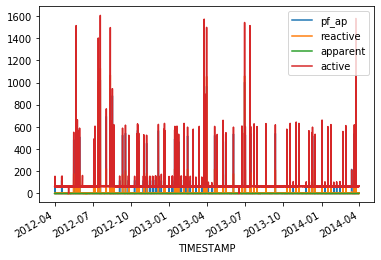

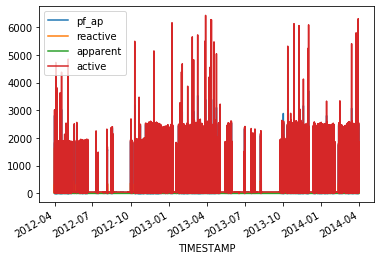

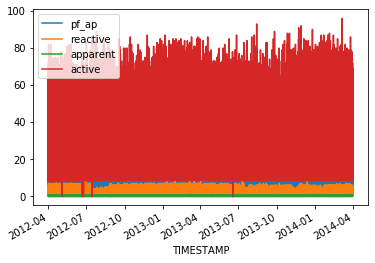

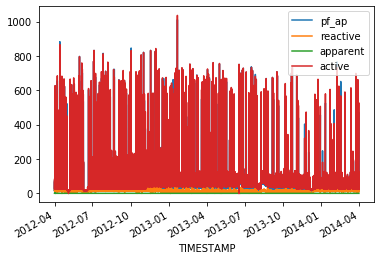

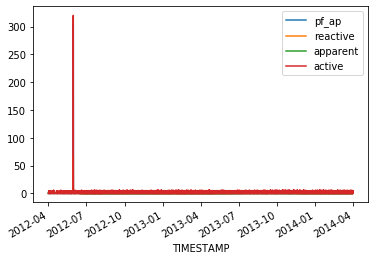

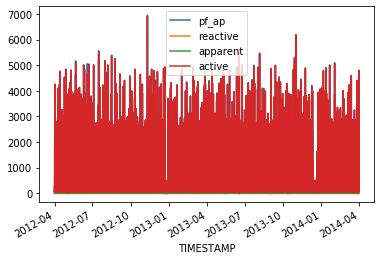

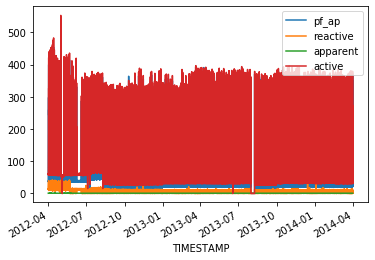

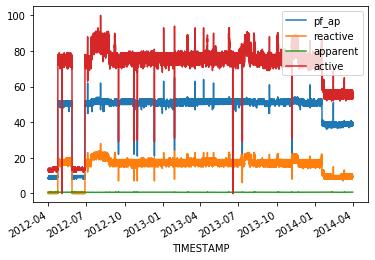

In [77]:
for k in dataset.keys():
    if 'INFO' in k:
        print(dataset[k])
        print('\n\n\n')
    else:
        i = 0
        df = dataset[k]
        df.plot()

In [ ]:
#we want to maximize active
#minimize reactive
#charged on apparent